# Calculating the Asset Swap Spread

The asset swap spread is widely used as measures of pure credit risk. In this notebook I calculate these quantities.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.utils import *
from financepy.products.bonds import *

####################################################################
# FINANCEPY BETA Version 0.33 - This build:  11 Nov 2023 at 07:47 #
#     This software is distributed FREE AND WITHOUT ANY WARRANTY   #
#  Report bugs as issues at https://github.com/domokane/FinancePy  #
####################################################################



In [3]:
issue_date = Date(15, 5, 2000)
maturity_date = Date(15, 5, 2027)
coupon = 0.02375
freq_type = FrequencyTypes.SEMI_ANNUAL
dc_type = DayCountTypes.ACT_ACT_ICMA
face_amount = 100.0 

In [4]:
bond = Bond(issue_date, maturity_date, coupon, freq_type, dc_type)

In [5]:
print(bond)

OBJECT TYPE: Bond
ISSUE DATE: 15-MAY-2000
MATURITY DATE: 15-MAY-2027
COUPON (%): 2.375
FREQUENCY: FrequencyTypes.SEMI_ANNUAL
DAY COUNT TYPE: DayCountTypes.ACT_ACT_ICMA
EX_DIV DAYS: 0


## Asset Swap Spread

To calculate the asset swap spread we need a Libor reference curve. I just create a simple flat curve.

In [6]:
from financepy.market.curves.discount_curve_flat import DiscountCurveFlat

In [7]:
liborFlatRate = 0.0275

In [8]:
settle_date = Date(21, 7, 2017)

In [9]:
liborFlatCurve = DiscountCurveFlat(settle_date, liborFlatRate, FrequencyTypes.SEMI_ANNUAL)

In [10]:
print(liborFlatCurve)

OBJECT TYPE: DiscountCurveFlat
FLAT RATE: 0.0275
FREQUENCY: FrequencyTypes.SEMI_ANNUAL
DAY COUNT: DayCountTypes.ACT_ACT_ISDA



To caluclate the ASW I need to know the clean price of the bond

In [11]:
clean_price = 99.780842  # I specified face to be 100 - if face is 1 then this must be 0.99780842

I then call a function passing in the date, price and curve

In [12]:
bond.asset_swap_spread(settle_date, clean_price, liborFlatCurve) * 10000

-33.69913338080966

The bond ASW is negative so it is trading tighter than the Libor curve. I need to cheapen the bond to make the ASW positive.

In [13]:
clean_price = 93.382  # I specified face to be 100 

In [14]:
bond.asset_swap_spread(settle_date, clean_price, liborFlatCurve) * 10000

38.48148022319349

To get date functionality you import Date

## Analysis of the Asset Swap Spread

We can use the vectorisations to do some basic analysis. First generate a vector of prices from 90 to 110 with 20 steps.

In [15]:
clean_prices = np.linspace(75,125,20)

In [16]:
asws = bond.asset_swap_spread(settle_date, clean_prices, liborFlatCurve)

We can now plot the relationship.

Text(0, 0.5, 'Asset Swap Spread (bp)')

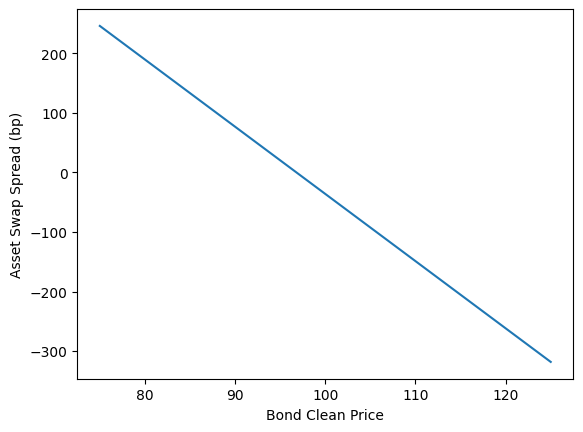

In [17]:
plt.plot(clean_prices,asws*10000)
plt.xlabel("Bond Clean Price")
plt.ylabel("Asset Swap Spread (bp)")

This is nicely linear and decreasing - the higher the bond price the better its implied credit risk versus Libor discounting so the lower its asset swap spread.

Copyright (c) 2020 Dominic O'Kane